In [1]:
import numpy as np
import cv2
from New_PCA import NPCA
from Classify import Classify
import matplotlib.pyplot as plt
from FaceDetection import FaceDetection 

In [2]:
X = np.load('./NewImgs.npy')
y = np.load('./Newy.npy')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
pca = NPCA()
Model = Classify()
Face = FaceDetection()

In [5]:
pca.apply_pca(X_train)
X_new = pca.preprocess_data(X_train)

In [6]:
pca.cut_values(0.99)
X_red = pca.reduce_dim(X_new)

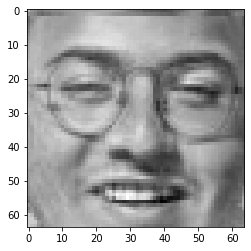

In [7]:
import matplotlib.pyplot as plt
X_recover = pca.reconstruct(X_red[10,:])
plt.imshow(X_recover.reshape(64,64),cmap="gray")

In [8]:
X_test_new = pca.preprocess_data(X_test)
X_test_new = pca.reduce_dim(X_test_new)

In [9]:
Model.fit(X_red,y_train,5)

In [10]:
acc = 0
for i in range(len(y_test)):
    y_hat = Model.predict(X_test_new[i,:])
    if y_hat == y_test[i]:
        acc += 1
print(acc/len(y_test))

0.8958333333333334


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model_svm = SVC()
best_model = GridSearchCV(model_svm,{'kernel' : ('poly', 'rbf','linear'), 'C':[0.01, 0.1, 0.5, 1, 10,20,30,40]})
best_model.fit(X_red,y_train)
print(best_model.best_params_)

{'C': 10, 'kernel': 'linear'}


In [12]:
from sklearn.svm import SVC
SVmmodel = SVC(kernel="linear",C=10)
SVmmodel.fit(X_red,y_train)

SVC(C=10, kernel='linear')

In [13]:
SVmmodel.score(X_test_new,y_test)

0.8958333333333334

3


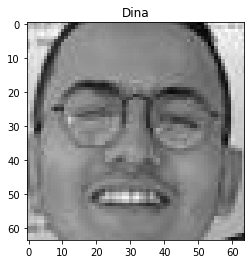

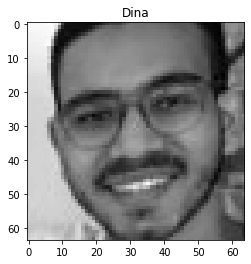

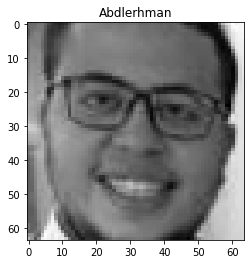

In [21]:
import cv2
names = ['Ahmed','Rabea','Nasser','Dina','Abdlerhman']
X_try = cv2.imread('./4.jpg',0)
n,dim  = Face.detect_faces('./4.jpg')
print(n)
imgs_n = []
pred = []
for i in range(n):
    new_img = X_try[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
    new_img = cv2.resize(new_img,(64,64))
    imgs_n.append(new_img)
imgs_n = np.array(imgs_n)
ll = pca.preprocess_data(imgs_n)
ll = pca.reduce_dim(ll)
for i in range(n):
    # y_hat = SVmmodel.predict(ll[i].reshape(1,-1))
    y_hat = Model.predict(ll[i,:])
    pred.append(names[y_hat]) 
    plt.title(pred[i])
    plt.imshow(imgs_n[i],cmap="gray")
    plt.show()

In [22]:
Model.save_weights()

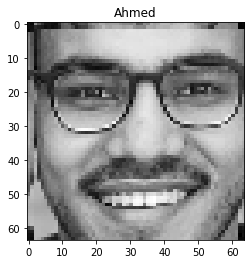

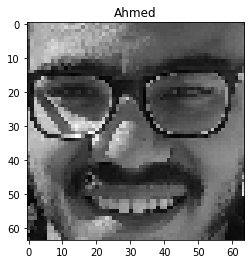

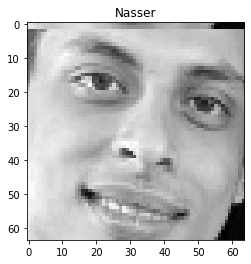

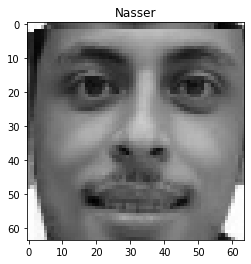

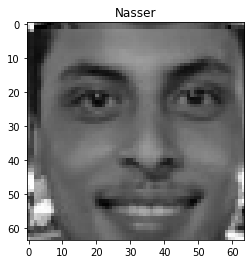

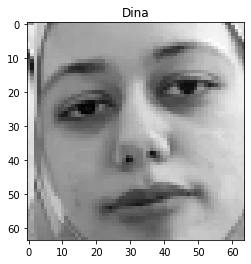

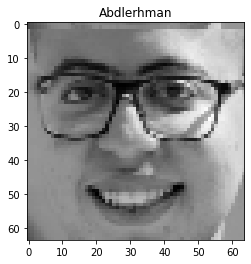

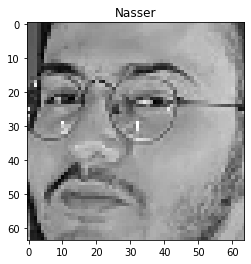

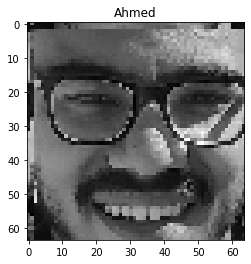

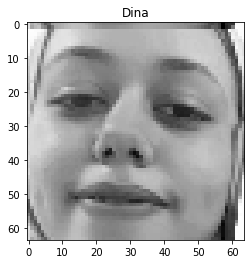

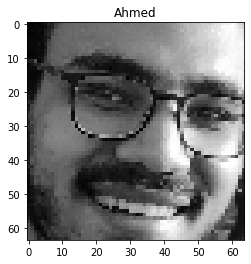

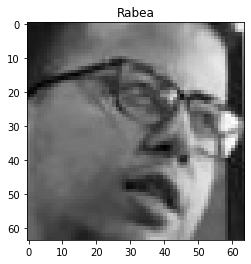

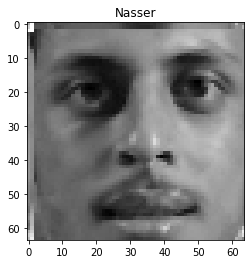

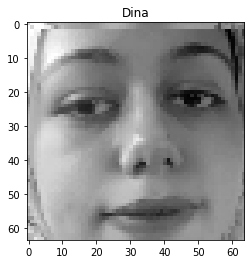

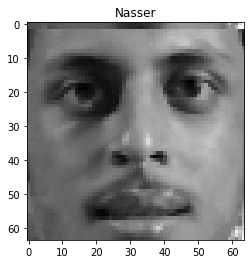

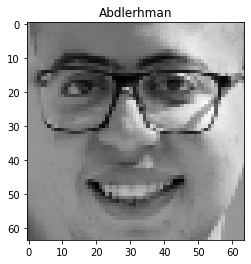

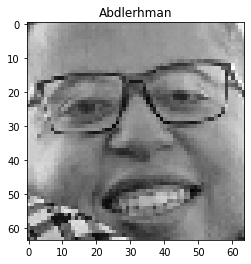

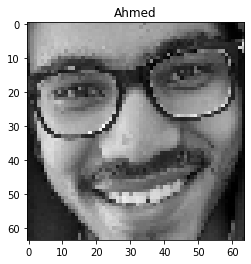

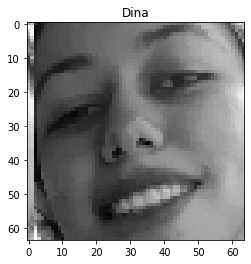

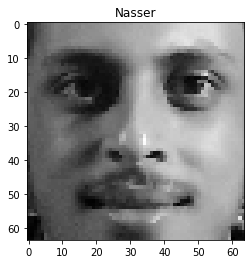

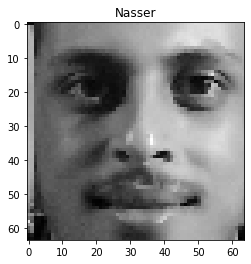

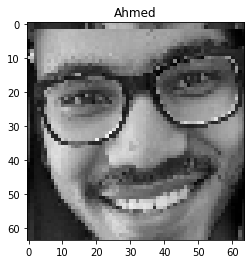

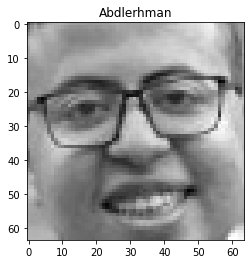

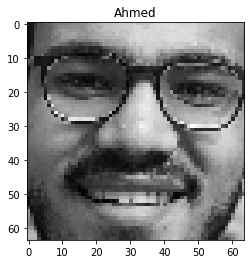

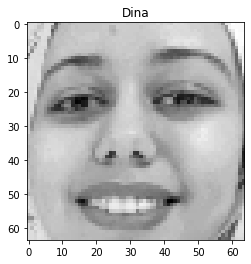

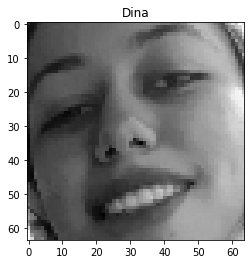

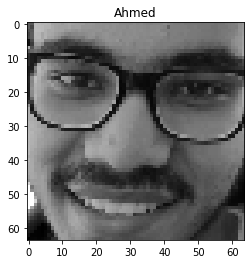

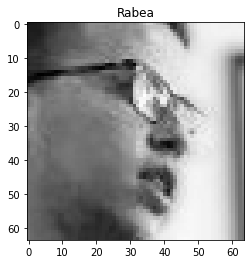

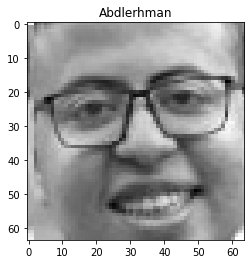

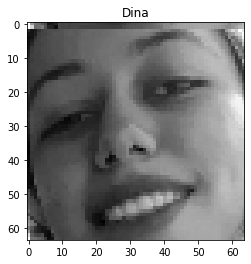

In [23]:
names = ['Ahmed','Rabea','Nasser','Dina','Abdlerhman']
pred = []
for i in range(30):
    # y_hat,mu = img_classifer.predict(X_test_reduced[i,:])
    y_hat = Model.predict(X_test_new[i,:])
    pred.append(names[y_hat]) 
    plt.title(pred[i])
    plt.imshow(X_test[i,:].reshape((64,64)),cmap="gray")
    plt.show()